# Affine

- 仿射变换（Affine Transformation）
    - 一种保持平行线的几何变换。
    - 线性变换 + 平移

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

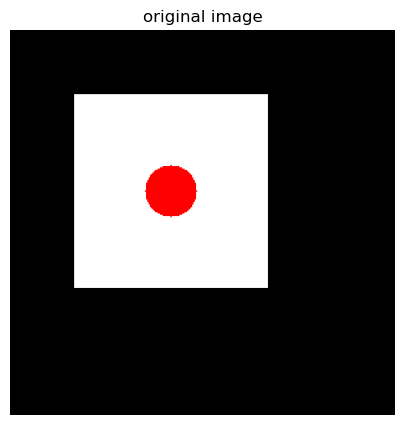

In [2]:
img = np.zeros((300, 300, 3), dtype=np.uint8)
cv2.rectangle(img, (50, 50), (200, 200), (255, 255, 255), -1)
cv2.circle(img, (125, 125), 20, (0, 0, 255), -1)

def show_img(title, image):
    plt.figure(figsize=(5,5))
    plt.title(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

show_img("original image", img)

## translation

- `cv2.warpAffine()`

300 300


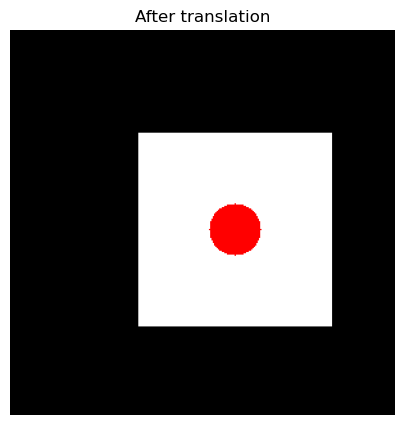

In [3]:
# 向右移动 50 像素，向下移动 30 像素
tx, ty = 50, 30

# 定义平移矩阵 (注意数据类型必须是 float32)
M_translate = np.float32([[1, 0, tx], 
                          [0, 1, ty]])

# 使用 cv2.warpAffine 应用变换
# 参数: (输入图像, 变换矩阵, 输出图像大小)
rows, cols = img.shape[:2]
print(rows, cols)

img_translated = cv2.warpAffine(img, M_translate, (cols, rows))

show_img("After translation", img_translated)

## rotation

- `cv2.getRotationMatrix2D()`

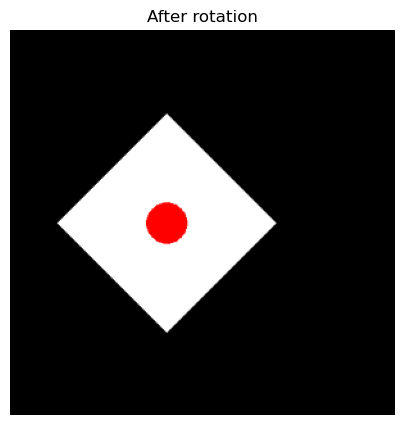

In [4]:
# 定义旋转中心 (通常是图像中心)
center = (cols // 2, rows // 2)
angle = 45  # 逆时针旋转 45 度
scale = 0.8 # 缩小为原来的 0.8 倍

# 获取旋转矩阵 (2x3 矩阵)
M_rotate = cv2.getRotationMatrix2D(center, angle, scale)

img_rotated = cv2.warpAffine(img, M_rotate, (cols, rows))

show_img("After rotation", img_rotated)

## three points

- `cv2.getAffineTransform()`

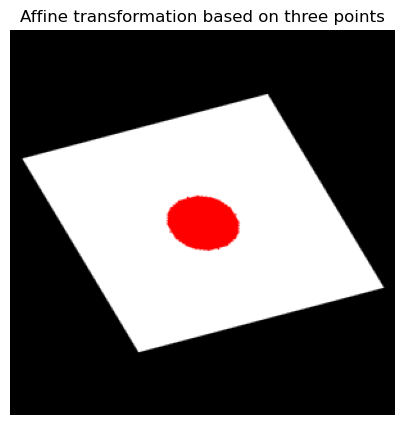

In [5]:
# 1. 定义原图中的三个点 (左上角, 右上角, 左下角)
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])

# 2. 定义这三个点希望变换到的位置
# 比如：让它们稍微倾斜一点
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

# 3. 让 OpenCV 帮我们计算矩阵
M_affine = cv2.getAffineTransform(pts1, pts2)

# 4. 应用变换
img_affine = cv2.warpAffine(img, M_affine, (cols, rows))

show_img("Affine transformation based on three points", img_affine)